In [638]:
import pandas as pd
import matplotlib.pyplot as plt

In [639]:
# Read CSV file 
df = pd.read_csv("SIS_Faculty-List.csv", encoding="ISO-8859-1")

In [640]:
df.head()

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,NaN,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,NaN,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,NaN,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 19 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                         --------------  ----- 
 0   ID                                                                                                                             282 non-null    object
 1   Name                                                                                                                           284 non-null    object
 2   Location                                                                                                                       270 non-null    object
 3   Grade                                                                                                              

In [642]:
df.isnull().sum()

ID                                                                                                                                 2
Name                                                                                                                               0
Location                                                                                                                          14
Grade                                                                                                                              0
Title                                                                                                                              0
Join\nDate                                                                                                                         1
LWD                                                                                                                              273
Type                                                                 

In [643]:
df.isna().sum()

ID                                                                                                                                 2
Name                                                                                                                               0
Location                                                                                                                          14
Grade                                                                                                                              0
Title                                                                                                                              0
Join\nDate                                                                                                                         1
LWD                                                                                                                              273
Type                                                                 

In [644]:
df.isnull().sum().sum()

476

In [645]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [646]:
# Basic statistics for numerical columns to help identify outliers
numerical_stats = df.describe()
numerical_stats

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
count,282,284,270,284,284,283,11,284,284,280,278,278,262,278,274,273,225,222,284
unique,243,282,16,2,12,143,2,1,1,15,18,59,115,214,262,269,143,208,8
top,0,Zikida Koudou,Bristol,FA,Faculty - Business,14-Aug-16,17-Dec-15,Full Time,Business,Ian Varley,Masters,Master of Business Administrat,Business Administration,University of Wollongong,Master of Business Administrat (Business Admin...,Faculty Trainee/MBA in Progress,General Business,More than 5 years work experience,Industry & Teaching experience
freq,40,2,49,282,252,41,6,284,284,33,157,73,45,8,7,2,19,14,231


In [647]:
# Before cleansing
total_values = df.size
total_missing_values_before = df.isnull().sum().sum()
percentage_missing_before = (total_missing_values_before / total_values) * 100
print(percentage_missing_before)

8.82134914751668


In [648]:
# Calculate missing values before cleansing
missing_before = df.isna().sum()

In [649]:
# Drop columns
columns_to_drop = ["LWD", "Highest Qualification",
                   "All Qualifications from Profile",
                   "Courses Taught- Term 201510",
                   "MAJOR TEACHING FIELD",
                   "DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications",
                   "Type",
                   "Divison",
                   "Location",
                   "Name",
                   "Reports To",
                   "Major",
                   "University"]
df_cleaned = df.drop(columns=columns_to_drop)

In [650]:
df_cleaned.to_csv("SIS_Faculty-List_cleaned.csv")

In [651]:
df_cleaned.head()

,ID,Grade,Title,Join\nDate,Highest\nQualification\nLevel,Criteria
0,LT9210743,FA,Faculty - Business,29-Aug-10,Masters,Industry & Teaching experience
1,LT9001784,FA,Faculty - Business,19-Aug-99,Masters,Certification
2,LT9062955,FA,Faculty - Business,08-Apr-07,Masters,Industry & Teaching experience
3,0,FA,Faculty - Business,14-Aug-16,Ph.D,Researcher
4,0,Chair,Faculty - Business,14-Aug-16,Ph.D,Researcher/Curriculum Development


In [652]:
# Rename columns
columns_to_renamed = {
    'Join\nDate': 'JoinDate',
    'Highest\nQualification\nLevel': 'Qualification'
}
df_cleaned = df_cleaned.rename(columns=columns_to_renamed)

In [653]:
df_cleaned.head()

,ID,Grade,Title,JoinDate,Qualification,Criteria
0,LT9210743,FA,Faculty - Business,29-Aug-10,Masters,Industry & Teaching experience
1,LT9001784,FA,Faculty - Business,19-Aug-99,Masters,Certification
2,LT9062955,FA,Faculty - Business,08-Apr-07,Masters,Industry & Teaching experience
3,0,FA,Faculty - Business,14-Aug-16,Ph.D,Researcher
4,0,Chair,Faculty - Business,14-Aug-16,Ph.D,Researcher/Curriculum Development


In [654]:
(df['ID'] == '0').sum()

40

In [655]:
# Filter ID column which includes a non-zero and null
df_cleaned = df_cleaned.loc[(df_cleaned['ID'] != '0') & (df_cleaned['ID'].notnull())]

In [656]:
df_cleaned.head()

,ID,Grade,Title,JoinDate,Qualification,Criteria
0,LT9210743,FA,Faculty - Business,29-Aug-10,Masters,Industry & Teaching experience
1,LT9001784,FA,Faculty - Business,19-Aug-99,Masters,Certification
2,LT9062955,FA,Faculty - Business,08-Apr-07,Masters,Industry & Teaching experience
5,LT9329000,FA,Faculty - Business,10-Aug-15,Doctorate,Industry & Teaching experience
6,LT9308851,FA,Faculty - Business (Admin),08-Mar-15,Masters,Industry & Teaching experience


In [657]:
id_data_constraint = 'LT'
non_LT_ID_count = len(df_cleaned) - df_cleaned['ID'].str.startswith(id_data_constraint).sum()
non_LT_ID_count

5

In [658]:
mask = df_cleaned['ID'].str.startswith(id_data_constraint)
df_cleaned = df_cleaned[mask]

In [659]:
df_cleaned.isnull().sum()

ID               0
Grade            0
Title            0
JoinDate         0
Qualification    6
Criteria         0
dtype: int64

In [660]:
df_cleaned.isna().sum()

ID               0
Grade            0
Title            0
JoinDate         0
Qualification    6
Criteria         0
dtype: int64

In [661]:
# Convert FA Grade to 0.0
df_cleaned['Grade'] = df_cleaned['Grade'].replace('FA', 0.0)

In [662]:
df_cleaned['Qualification'].value_counts()

Qualification
Masters                                                                     153
Doctorate                                                                    52
Bachelor                                                                     11
Bachelor (Applied Science) in Business administration( Human Resources )      1
 Doctorate of Business Administration                                         1
 Ph. D. (Business Administration)                                             1
Maters of Philosophy (Economics)                                              1
Master's Degree in Public Relations and Press Office Management               1
PhD Corporate Governance and Accounting                                       1
Masters (Business Administration), Master of Philosophy (Business)            1
Master of Business Administration (MBA) and MA (Economics)                    1
Ph.D in Organization and Management                                           1
Master of International Bu

In [663]:
df_cleaned.Qualification.isna().sum()

6

In [664]:
df_cleaned = df_cleaned.dropna(subset=['Qualification'])

In [665]:
df_cleaned.Qualification.isna().sum()

0

In [666]:
df_cleaned['Qualification'] = df_cleaned['Qualification'].str.lower()
valid_qualifications = ['masters', 'doctorate', 'ph.d', 'bachelor']
df_cleaned = df_cleaned[df_cleaned['Qualification'].isin(valid_qualifications)]

In [667]:
df_cleaned.head()

,ID,Grade,Title,JoinDate,Qualification,Criteria
0,LT9210743,0.0,Faculty - Business,29-Aug-10,masters,Industry & Teaching experience
1,LT9001784,0.0,Faculty - Business,19-Aug-99,masters,Certification
2,LT9062955,0.0,Faculty - Business,08-Apr-07,masters,Industry & Teaching experience
5,LT9329000,0.0,Faculty - Business,10-Aug-15,doctorate,Industry & Teaching experience
6,LT9308851,0.0,Faculty - Business (Admin),08-Mar-15,masters,Industry & Teaching experience


In [668]:
qualification_mapping = {"bachelor": 1, "masters": 2, "doctorate": 3, "ph.d": 4}
df_cleaned['Qualification'] = df_cleaned['Qualification'].map(qualification_mapping)

In [669]:
df_cleaned.head()

,ID,Grade,Title,JoinDate,Qualification,Criteria
0,LT9210743,0.0,Faculty - Business,29-Aug-10,2,Industry & Teaching experience
1,LT9001784,0.0,Faculty - Business,19-Aug-99,2,Certification
2,LT9062955,0.0,Faculty - Business,08-Apr-07,2,Industry & Teaching experience
5,LT9329000,0.0,Faculty - Business,10-Aug-15,3,Industry & Teaching experience
6,LT9308851,0.0,Faculty - Business (Admin),08-Mar-15,2,Industry & Teaching experience


In [670]:
df_cleaned.Title.value_counts()

Title
Faculty - Business                       198
Faculty - Trainee                          8
Faculty- Business                          2
Faculty - Business (Admin)                 1
Adjunct Faculty - Business                 1
Faculty-Business (HR & Admin.)             1
Faculty - Business                         1
Faculty - Business & Comp Lit Faculty      1
Faculty-Business                           1
Business, Comp & Math Faculty              1
Graduate Trainee                           1
Faculty - Business & Comp Lit.             1
Name: count, dtype: int64

In [671]:
df_cleaned.loc[(df_cleaned['Title'] != 'Faculty - Trainee') & (
        df_cleaned['Title'] != 'Graduate Trainee'), 'Title'] = 'Faculty - Business'
df_cleaned['Title'].value_counts()

Title
Faculty - Business    208
Faculty - Trainee       8
Graduate Trainee        1
Name: count, dtype: int64

In [672]:
title_mapping_dict = {
    'Faculty - Business': 'Faculty-Business',
    'Faculty - Trainee': 'Faculty-Trainee',
    'Graduate Trainee': 'Faculty-Trainee',
}
df_cleaned['Title'] = df_cleaned['Title'].replace(title_mapping_dict)

In [673]:
df_cleaned.Title.value_counts()

Title
Faculty-Business    208
Faculty-Trainee       9
Name: count, dtype: int64

In [674]:
title_mapping = {"Faculty-Business": 1, "Faculty-Trainee": 2}
df_cleaned['Title'] = df_cleaned['Title'].map(title_mapping)

In [675]:
df_cleaned.Title.value_counts()

Title
1    208
2      9
Name: count, dtype: int64

In [676]:
df_cleaned.Criteria.value_counts()

Criteria
Industry & Teaching experience    192
Certification                      22
Trainee                             2
Researcher                          1
Name: count, dtype: int64

In [677]:
# Create a dataframe with each category separated
criteria = df_cleaned['Criteria'].str.get_dummies('/')
df_cleaned = df_cleaned.drop(columns=['Criteria'])

# Join with the original dataframe
df_cleaned = df_cleaned.join(criteria)

In [678]:
df_cleaned.head()

,ID,Grade,Title,JoinDate,Qualification,Certification,Industry & Teaching experience,Researcher,Trainee
0,LT9210743,0.0,1,29-Aug-10,2,0,1,0,0
1,LT9001784,0.0,1,19-Aug-99,2,1,0,0,0
2,LT9062955,0.0,1,08-Apr-07,2,0,1,0,0
5,LT9329000,0.0,1,10-Aug-15,3,0,1,0,0
6,LT9308851,0.0,1,08-Mar-15,2,0,1,0,0


In [679]:
df_cleaned['JoinDate'] = pd.to_datetime(df_cleaned['JoinDate'], format='%d-%b-%y')

In [680]:
df_cleaned.isna().sum()

ID                                0
Grade                             0
Title                             0
JoinDate                          0
Qualification                     0
Certification                     0
Industry & Teaching experience    0
Researcher                        0
Trainee                           0
dtype: int64

In [681]:
# After cleansing
total_missing_values_after = df_cleaned.isnull().sum().sum()
percentage_missing_after = (total_missing_values_after / total_values) * 100
percentage_missing_after

0.0

In [682]:
# Calculate missing values after cleansing
missing_after = df_cleaned.isna().sum()

In [683]:
# Create a combined DataFrame
missing_df = pd.concat([missing_before, missing_after], axis=1)
missing_df.columns = ['before', 'after']

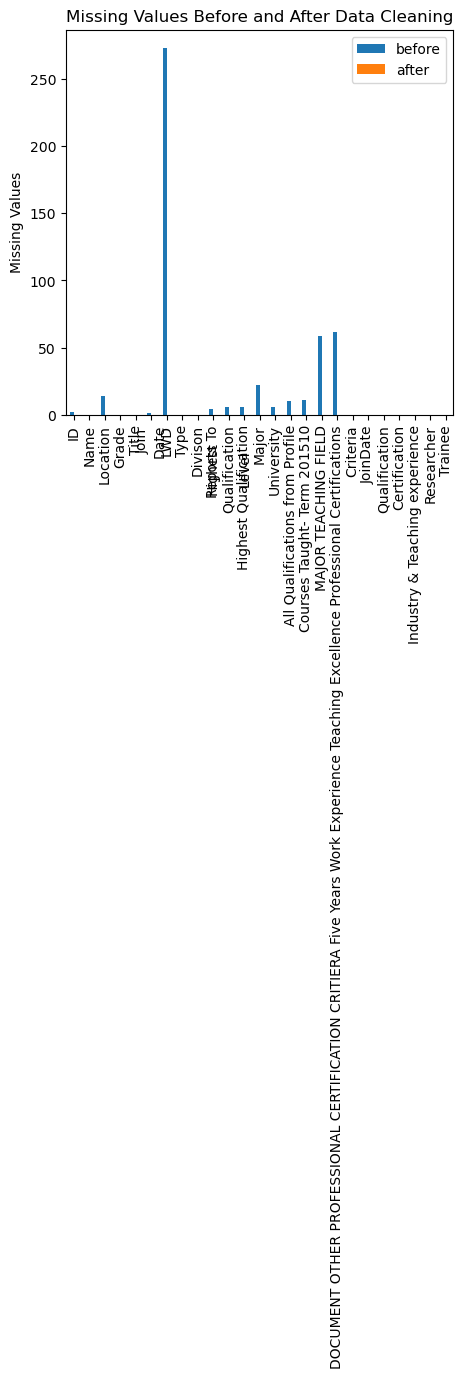

In [684]:
# Plotting
missing_df.plot(kind='bar', figsize=(5,5))
plt.ylabel('Missing Values')
plt.title('Missing Values Before and After Data Cleaning')
plt.show()
# Save figure
plt.savefig('missing_values.png', dpi=600, bbox_inches='tight')
plt.close()

In [685]:
# Calculate the '0' values in 'ID' column before cleaning
ID_zero_counts_before = (df['ID'] == '0').sum()

# Calculate the '0' values in 'ID' column after cleaning
ID_zero_counts_after = (df_cleaned['ID'] == '0').sum()

In [686]:
# Create a DataFrame to plot
ID_zero_counts_df = pd.DataFrame({'Before Cleaning': [ID_zero_counts_before], 'After Cleaning': [ID_zero_counts_after]})
ID_zero_counts_df = ID_zero_counts_df.transpose()

Text(0.5, 1.0, 'Comparison of ID==0 Before and After Data Cleaning')

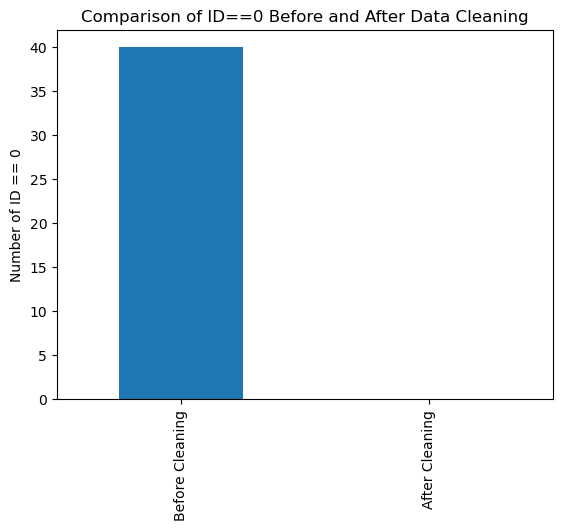

In [687]:
# Plotting
ID_zero_counts_df.plot(kind='bar', legend = False)
plt.ylabel('Number of ID == 0')
plt.title('Comparison of ID==0 Before and After Data Cleaning')

In [688]:
# Save figure
plt.tight_layout()
plt.savefig('ID_zero_counts_comparison.png', dpi=600, bbox_inches='tight')

plt.close()

In [689]:
# Number of rows before cleaning
rows_before = df.shape[0]

# Number of rows after cleaning
rows_after = df_cleaned.shape[0]

In [690]:
# Create a DataFrame for plotting
rows_df = pd.DataFrame({'Before Cleaning': [rows_before], 'After Cleaning': [rows_after]})
rows_df = rows_df.transpose()

Text(0.5, 1.0, 'Comparison of Number of Rows Before and After Data Cleaning')

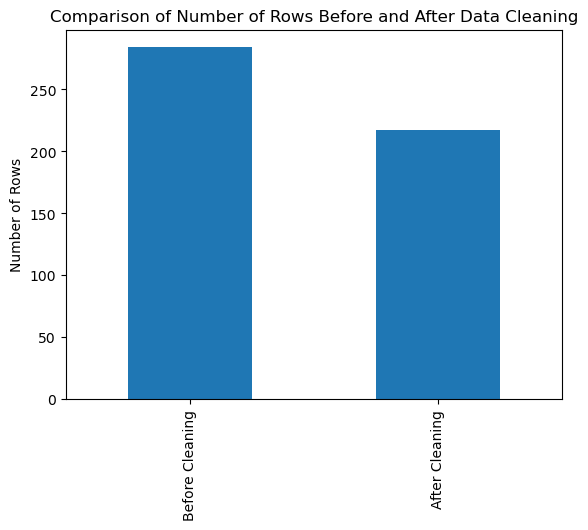

In [691]:
# Plotting
rows_df.plot(kind='bar', legend = False)
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows Before and After Data Cleaning')

In [692]:
# Save figure
plt.tight_layout()
plt.savefig('rows_comparison.png', dpi=600, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>